In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the data

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_01945d5538f442acbdffbc39c033f9da = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='t24jspjDhF-L90fgP8kp9QQeeJrkpRPMx05xIWoK2N-c',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_01945d5538f442acbdffbc39c033f9da.get_object(Bucket='lifeexpectancyprediction-donotdelete-pr-exaubxia1qnlua',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Exploring the Data

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Renaming columns appropriately

In [4]:
df.rename(columns={"Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years",
                   "Income composition of resources":"Income_Composition_Of_Resources","Total expenditure":"Total_Exp"},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life_Expectancy                    2928 non-null float64
Adult_Mortality                    2928 non-null float64
Infant_Deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage_Exp                     2938 non-null float64
HepatitisB                         2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under_Five_Deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total_Exp                          2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [6]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Composition_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### Identifying and handling null values

In [7]:
# Identify percentage of null values in each column
df.isnull().sum()*100/df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life_Expectancy                     0.340368
Adult_Mortality                     0.340368
Infant_Deaths                       0.000000
Alcohol                             6.603131
Percentage_Exp                      0.000000
HepatitisB                         18.822328
Measles                             0.000000
BMI                                 1.157250
Under_Five_Deaths                   0.000000
Polio                               0.646698
Total_Exp                           7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness_1to19_years                1.157250
thinness_5to9_years                 1.157250
Income_Composition_Of_Resources     5.684139
Schooling                           5.547992
dtype: flo

In [8]:
country_list = df.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio',
             'Total_Exp','Diphtheria','GDP','Population','thinness_1to19_years',
             'thinness_5to9_years','Income_Composition_Of_Resources','Schooling']

# Treat null values using interpolation
for country in country_list:
    df.loc[df['Country'] == country,fill_list] = df.loc[df['Country'] == country,fill_list].interpolate()
    
# Drop remaining null values after interpolation
df.dropna(inplace=True)

In [9]:
# Verifying null-values after applying above methods
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Exp                     0
HepatitisB                         0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Exp                          0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness_1to19_years               0
thinness_5to9_years                0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64

#### Detecting outliers for each variable

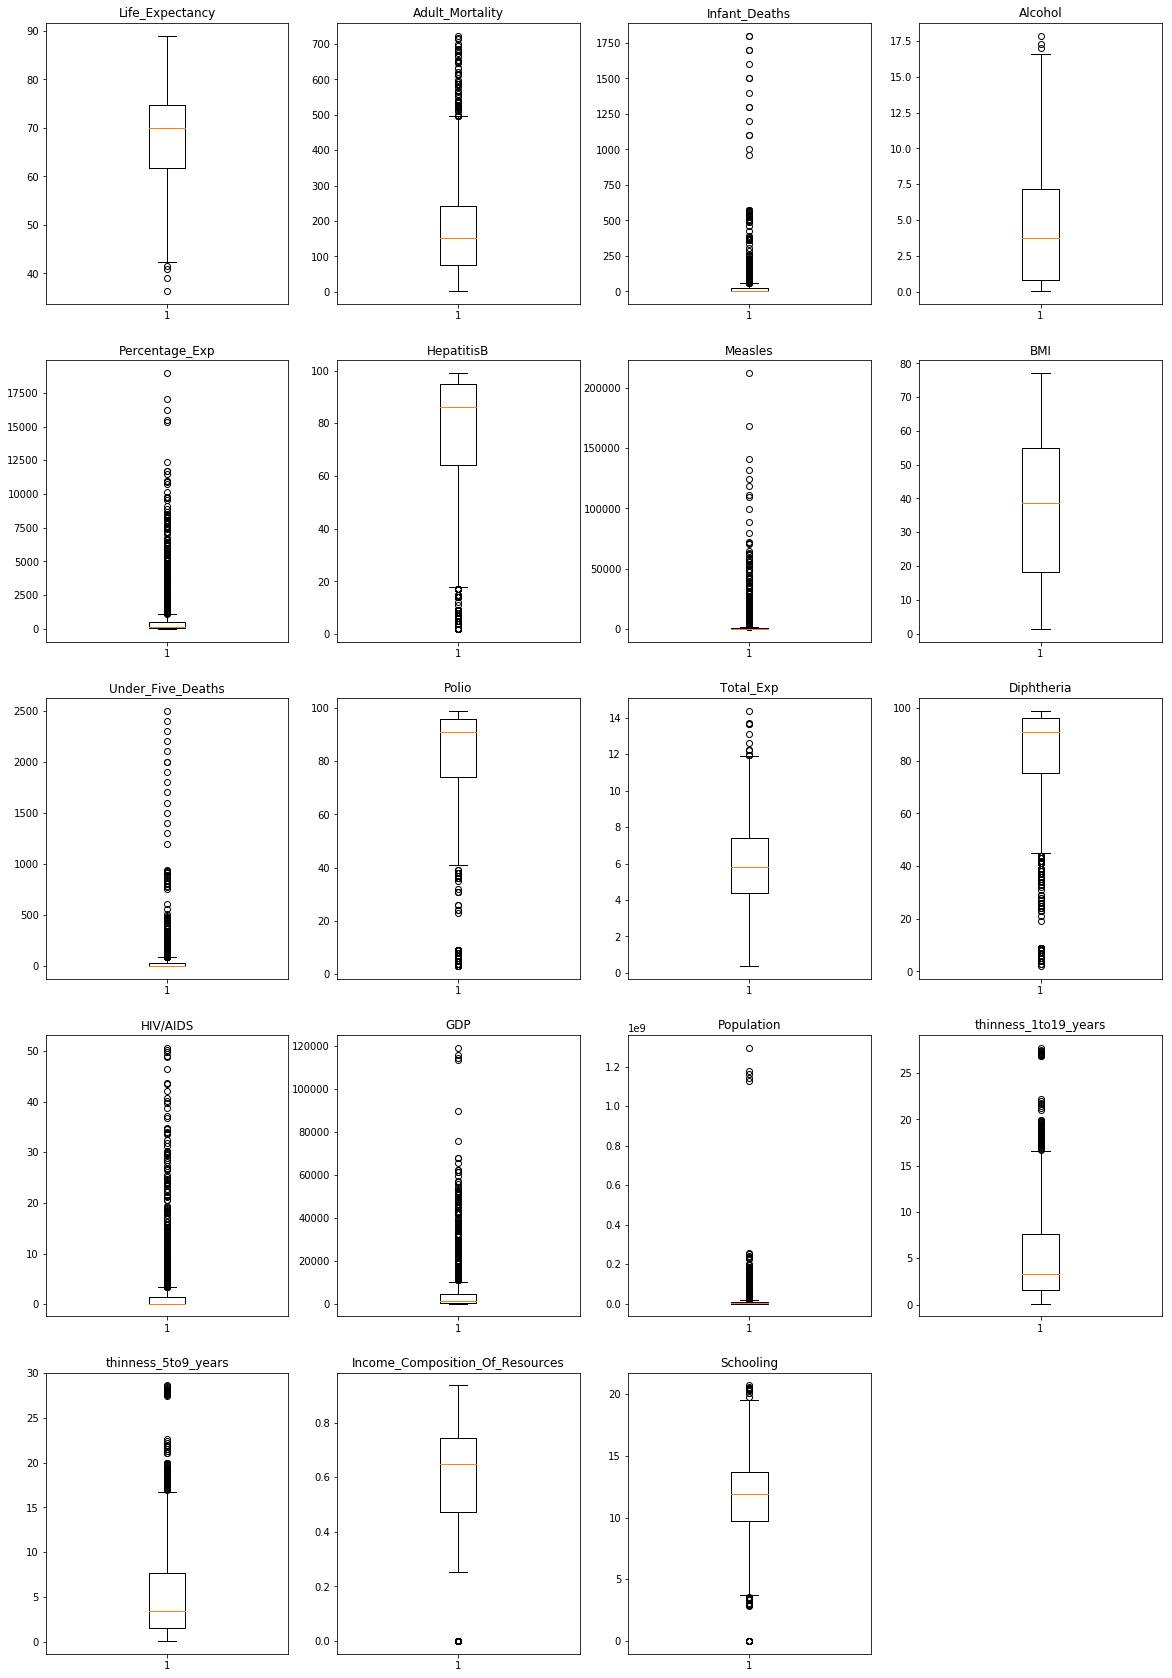

In [10]:
# Create a dictionary of columns
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,
            'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Total_Exp':11,
            'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,
            'thinness_5to9_years':17,'Income_Composition_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(df[variable],whis=1.5)
    plt.title(variable)

plt.show()


In [11]:
# Calculate number of outliers and its percentage in each variable using Tukey's method

for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0])),len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and per

#### Removing Outliers in the variables using Winsorization technique

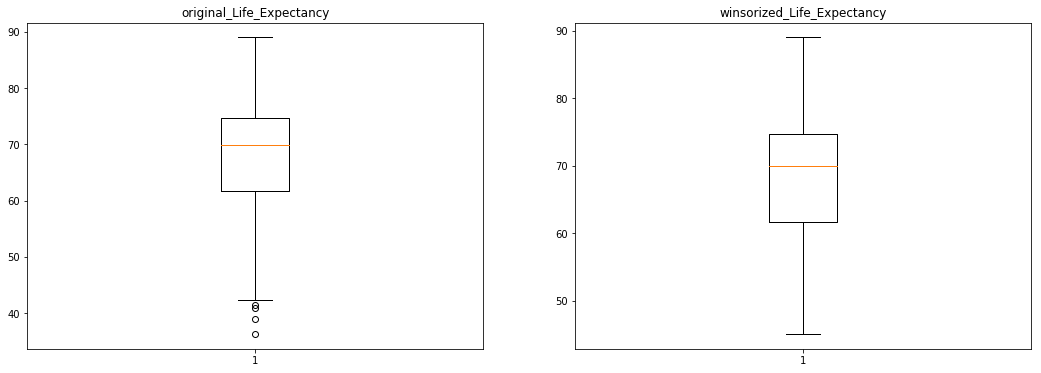

In [12]:
# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

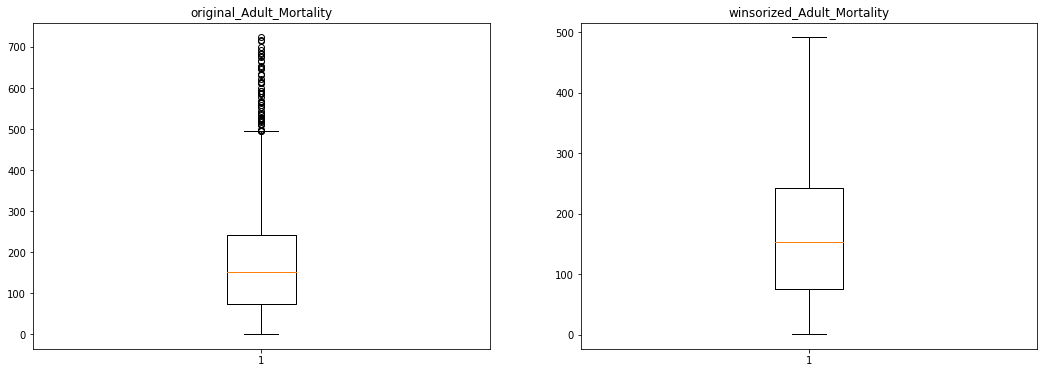

In [13]:
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

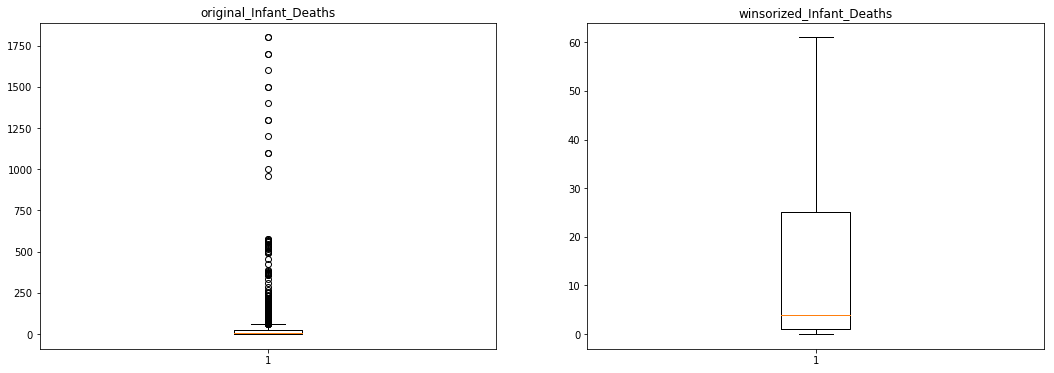

In [14]:
# Winsorize Infant_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

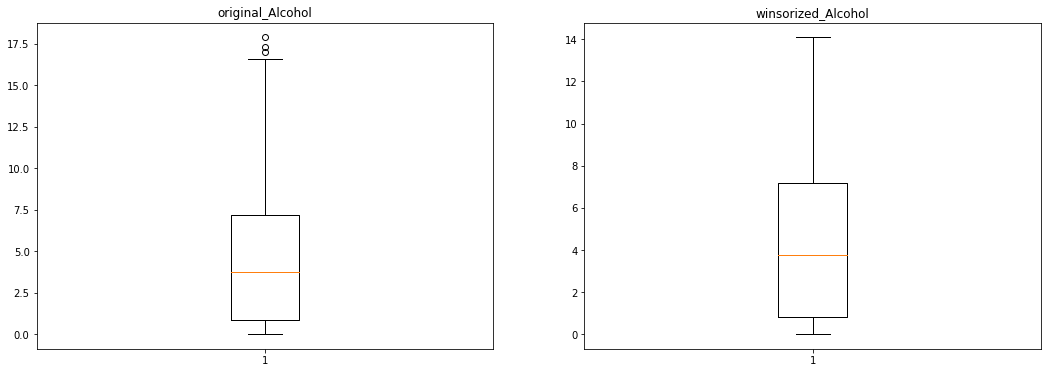

In [15]:
# Winsorize Alcohol
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = df['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

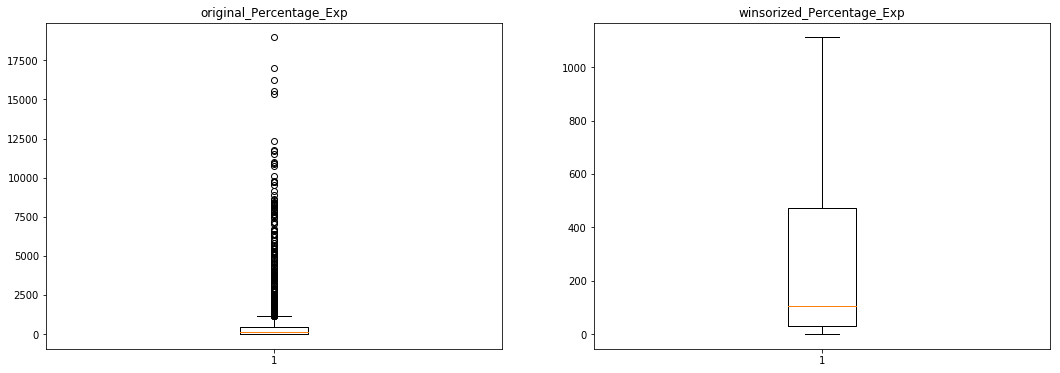

In [16]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

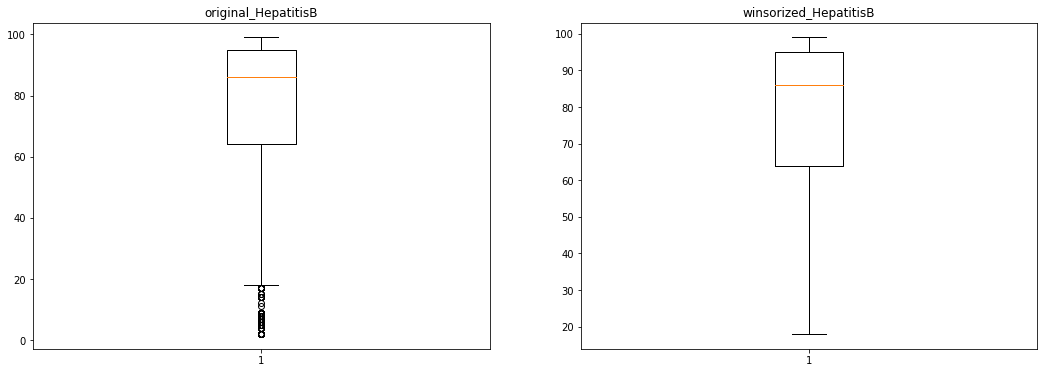

In [17]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

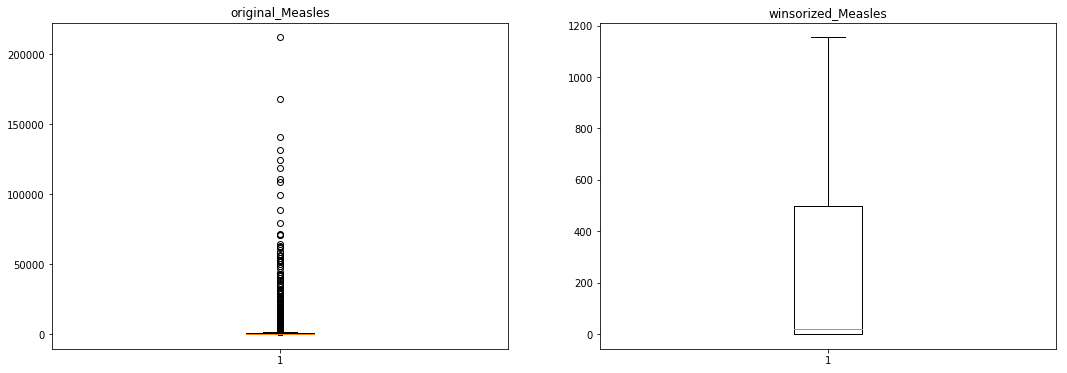

In [18]:
# Winsorize Measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

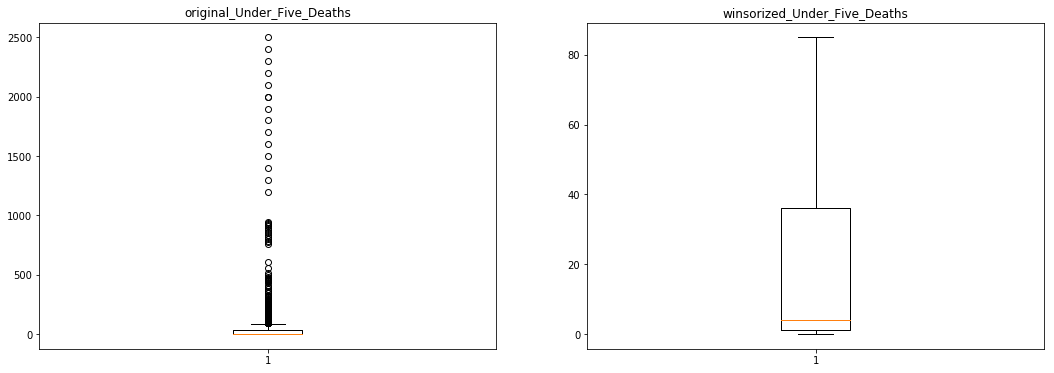

In [19]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

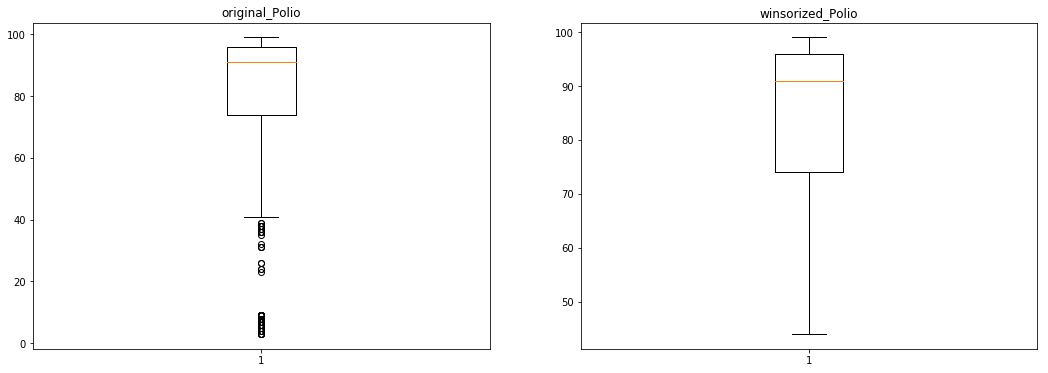

In [20]:
# Winsorize Polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

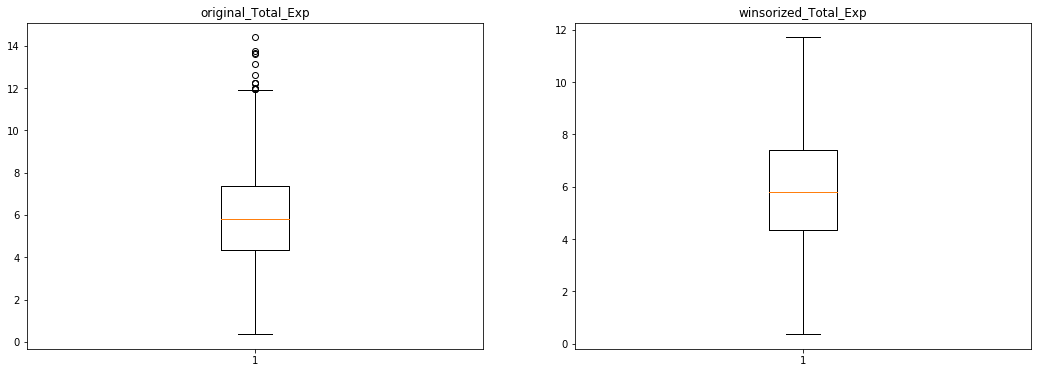

In [21]:
# Winsorize Total_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Total_Exp = df['Total_Exp']
plt.boxplot(original_Total_Exp)
plt.title("original_Total_Exp")

plt.subplot(1,2,2)
winsorized_Total_Exp = winsorize(df['Total_Exp'],(0,0.01))
plt.boxplot(winsorized_Total_Exp)
plt.title("winsorized_Total_Exp")

plt.show()

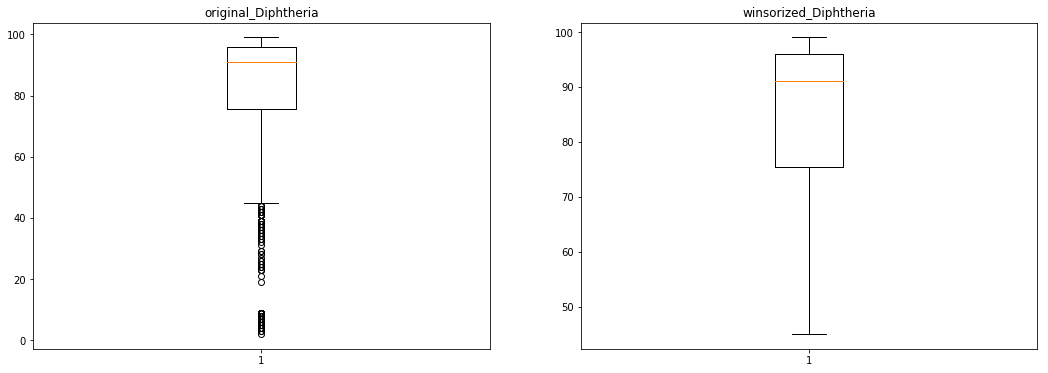

In [22]:
# Winsorize Diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

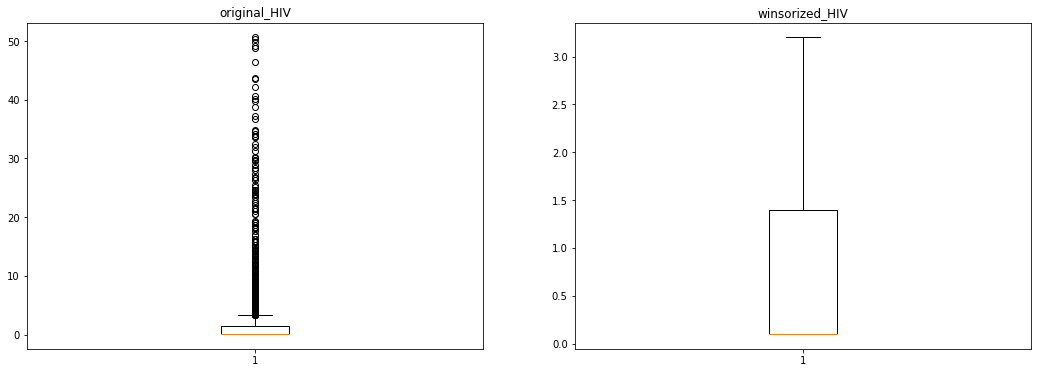

In [23]:
# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

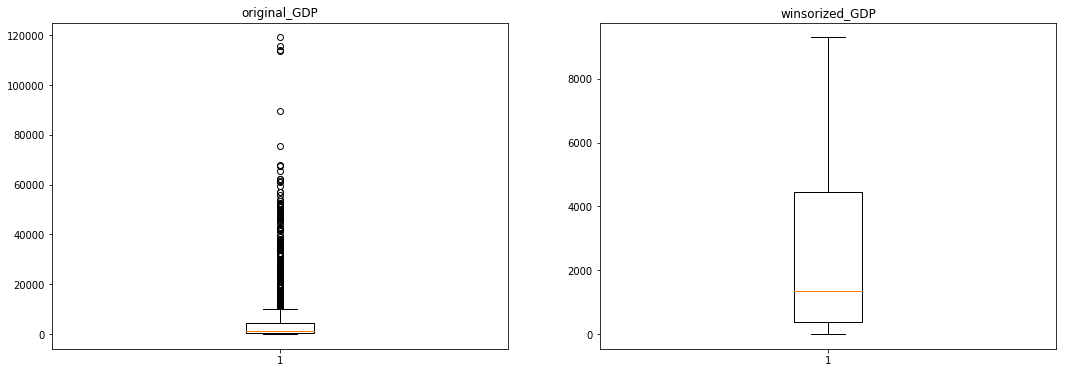

In [24]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

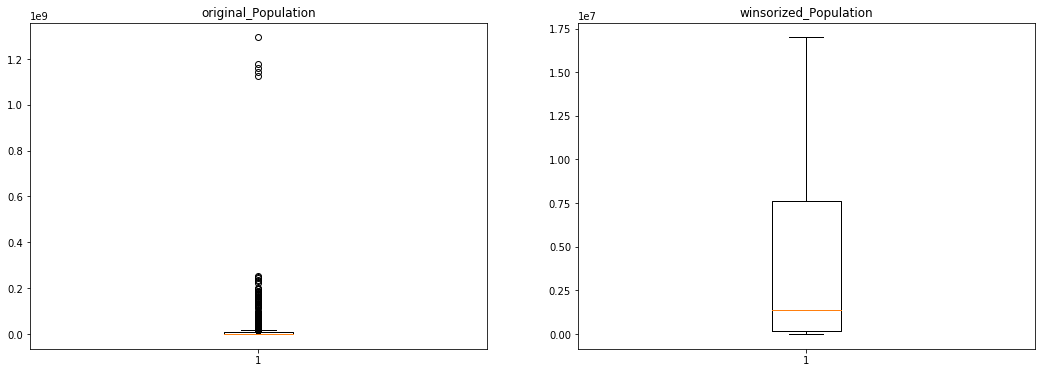

In [25]:
# Winsorize Population
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

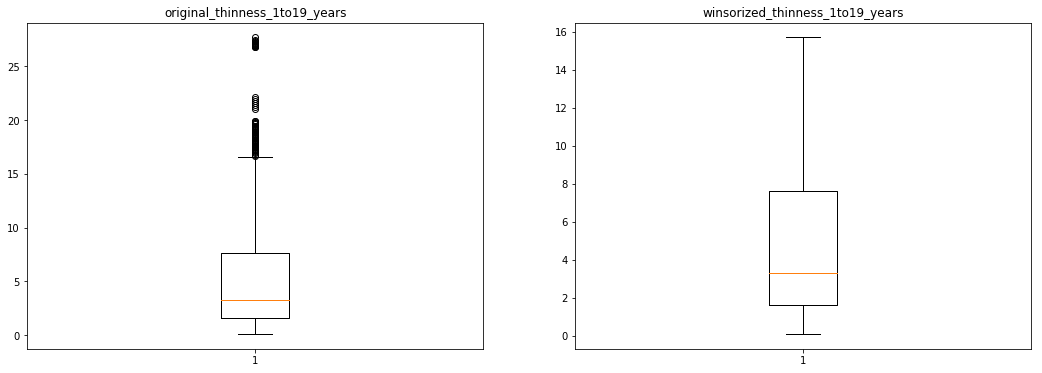

In [26]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

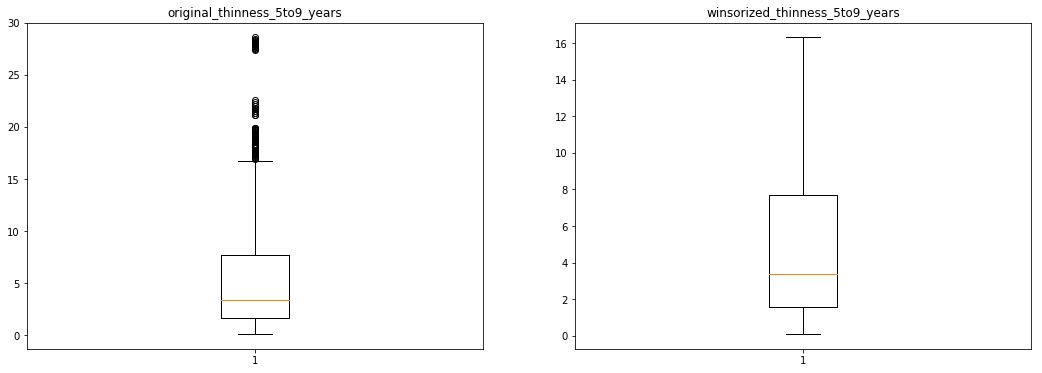

In [27]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

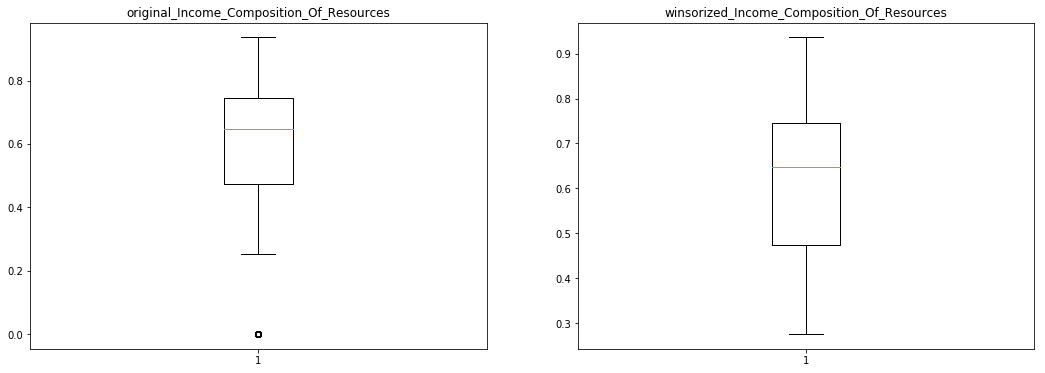

In [28]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Composition_Of_Resources = df['Income_Composition_Of_Resources']
plt.boxplot(original_Income_Composition_Of_Resources)
plt.title("original_Income_Composition_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Composition_Of_Resources = winsorize(df['Income_Composition_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Composition_Of_Resources)
plt.title("winsorized_Income_Composition_Of_Resources")

plt.show()

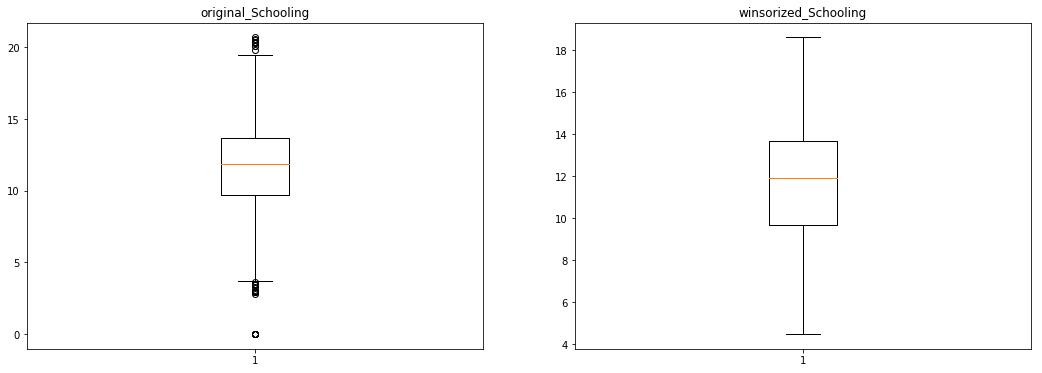

In [29]:
# Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [30]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,
            winsorized_HepatitisB,winsorized_Measles,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Total_Exp,
            winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,
            winsorized_thinness_5to9_years,winsorized_Income_Composition_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


#### Adding winsorized variables to the data frame

In [31]:
df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df['winsorized_Alcohol'] = winsorized_Alcohol
df['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df['winsorized_HepatitisB'] = winsorized_HepatitisB
df['winsorized_Measles'] = winsorized_Measles
df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df['winsorized_Polio'] = winsorized_Polio
df['winsorized_Total_Exp'] = winsorized_Total_Exp
df['winsorized_Diphtheria'] = winsorized_Diphtheria
df['winsorized_HIV'] = winsorized_HIV
df['winsorized_GDP'] = winsorized_GDP
df['winsorized_Population'] = winsorized_Population
df['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df['winsorized_Income_Composition_Of_Resources'] = winsorized_Income_Composition_Of_Resources
df['winsorized_Schooling'] = winsorized_Schooling

### Exploratory Data Analysis

In [32]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,...,winsorized_Polio,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Composition_Of_Resources,winsorized_Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,...,82.957725,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,...,17.556131,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,...,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,...,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,18.600000


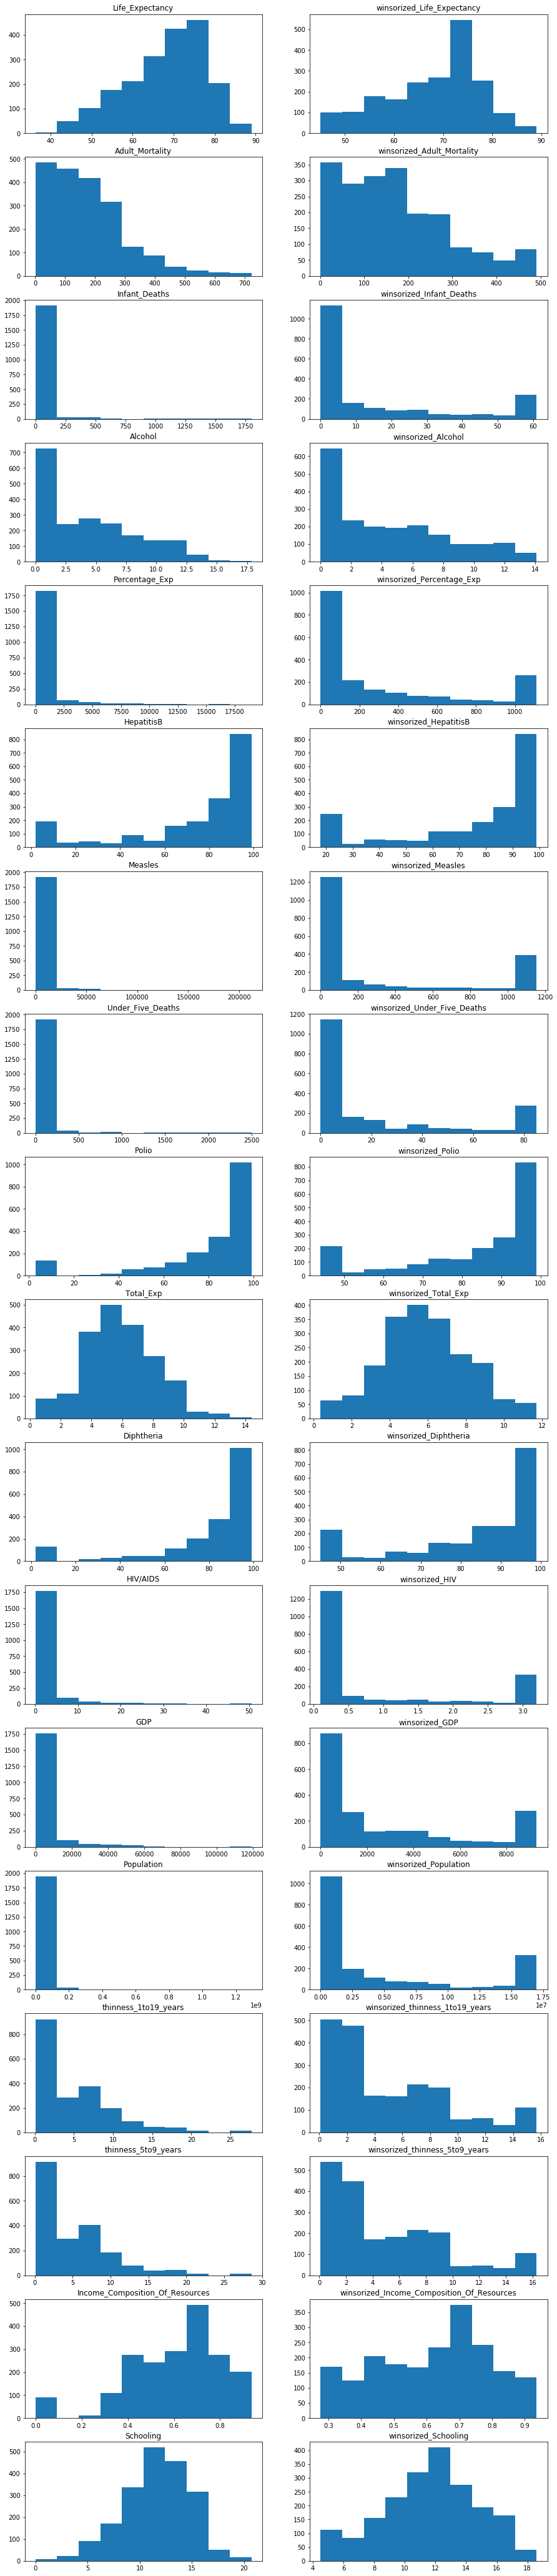

In [33]:
# Distribution of each numerical variable
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Measles','winsorized_Measles','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio',
         'Total_Exp','winsorized_Total_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Composition_Of_Resources','winsorized_Income_Composition_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(df[all_col[i]])
    plt.title(all_col[i])

plt.show()

winsorized_Life_Expectancy, winsorized_Total_Exp and winsorized_Schooling are nearly normally distributed.

In [34]:
# Descriptive statistics of categorical variables
df.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


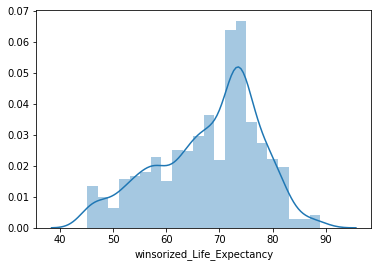

In [35]:
sns.distplot(df['winsorized_Life_Expectancy'])

In [36]:
round(df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


From this, developed countries have higher average Life_Expectancy compared to developing countries.

In [37]:
# Finding the significance of difference of Average_Life_Expectancy between developed and developing countries using t-test
import scipy.stats as stats
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'],df.loc[df['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

p value is < 0.05
Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

In [38]:
df = pd.concat([df,pd.get_dummies(df['Status'],drop_first=True)],axis=1)
df = df.drop('Status',axis=1)
df.sample(10)

,Country,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,...,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Composition_Of_Resources,winsorized_Schooling,Developing
2215,Samoa,2000,72.0,18.0,0,3.00,21.254300,89.0,0,65.6,...,5.31,95.0,0.1,154.689230,17461.0,0.2,0.2,0.640,12.1,1
468,Cambodia,2011,67.0,19.0,13,2.12,60.185918,88.0,722,17.0,...,5.64,88.0,0.3,882.491462,14537886.0,11.0,11.2,0.533,10.7,1
2719,Uganda,2010,58.4,362.0,79,10.03,116.202964,8.0,1313,16.3,...,11.20,45.0,3.2,594.997256,16993354.0,6.0,6.0,0.473,10.9,1
1664,Mauritania,2002,62.0,228.0,7,0.02,4.113191,42.0,883,22.3,...,5.31,89.0,1.2,46.954232,2873228.0,1.5,1.3,0.446,6.5,1
1265,Ireland,2000,76.4,94.0,0,14.07,3794.581463,46.0,0,51.5,...,6.30,86.0,0.1,9291.227619,385174.0,0.3,0.3,0.848,16.2,0
2683,Turkey,2013,75.2,19.0,17,1.41,188.144035,97.0,7405,64.5,...,5.38,98.0,0.1,9291.227619,16993354.0,4.9,4.7,0.754,14.4,1
2670,Tunisia,2010,74.8,12.0,3,1.28,64.856167,98.0,1,56.5,...,6.54,98.0,0.1,414.151770,1639931.0,6.3,6.3,0.710,14.4,1
1017,Ghana,2008,63.0,275.0,41,1.78,161.010644,93.0,82,24.2,...,4.85,93.0,2.2,1224.415540,2329864.0,7.5,7.4,0.530,9.8,1
678,Cyprus,2010,79.5,59.0,0,11.32,283.330026,96.0,18,57.8,...,7.23,99.0,0.1,3818.463960,111267.0,0.9,1.0,0.853,14.6,0
1611,Maldives,2006,75.0,88.0,0,1.62,659.849912,98.0,47,18.7,...,7.37,98.0,0.1,4428.522898,333.0,14.3,14.5,0.622,12.0,1


In [39]:
round(df[['Developing','Life_Expectancy']].groupby(['Developing']).mean(),2)

,Life_Expectancy
Developing,
0,78.83
1,66.16


### Creating and Testing the Linear Regression Model

#### X and Y arrays

In [40]:
X= df[['Developing','winsorized_Adult_Mortality','winsorized_Infant_Deaths','winsorized_Alcohol','winsorized_Percentage_Exp',
         'winsorized_HepatitisB','winsorized_Measles','BMI','winsorized_Under_Five_Deaths','winsorized_Polio','winsorized_Total_Exp',
         'winsorized_Diphtheria','winsorized_HIV','winsorized_GDP','winsorized_Population',
         'winsorized_thinness_1to19_years','winsorized_thinness_5to9_years','winsorized_Income_Composition_Of_Resources',
         'winsorized_Schooling']]

Y = df['winsorized_Life_Expectancy']

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Training the model

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
lr_model = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, Y_train)

In [44]:
lr_predictions = lr_model.predict(X_test)

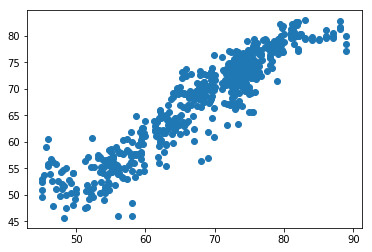

In [45]:
plt.scatter(Y_test,lr_predictions)

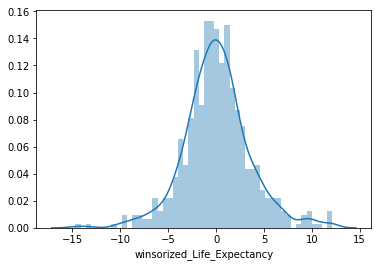

In [46]:
sns.distplot((Y_test-lr_predictions),bins=50);

In [47]:
r2_score(lr_predictions, Y_test)

0.8556337316163802

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(Y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(Y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, lr_predictions)))

MAE: 2.551964348556647
MSE: 12.118776659232159
RMSE: 3.4812033349449956


### Deploying the model

In [50]:
!pip install watson-machine-learning-client

In [51]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [52]:
# @hidden_cell
wml_credentials={
  "apikey": "WxUV_kZBuFrY59Lt3EBlnw4ITgZoYbh1KVVO66_eiDZQ",
  "instance_id": "0a887d6b-eb74-41e0-addd-c22cbff4dfea",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [53]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [54]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Amarjeet", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancyPrediction"}

In [55]:
model_artifact =client.repository.store_model(lr_model, meta_props=model_props)

In [56]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [57]:
published_model_uid

'c0d08344-feef-4efb-9af3-c3bf7d881fdf'

In [58]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancyPrediction")



#######################################################################################

Synchronous deployment creation for uid: 'c0d08344-feef-4efb-9af3-c3bf7d881fdf' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='33386e0f-3fe0-4747-9ad5-a3bea3e9662d'
------------------------------------------------------------------------------------------------




In [59]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [60]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0a887d6b-eb74-41e0-addd-c22cbff4dfea/deployments/33386e0f-3fe0-4747-9ad5-a3bea3e9662d/online'